# **GPT-4 Vision**

**¿Que es GPT-4 Vision?**

GPT-4 Vision es una extensión del modelo GPT-4 que permite analizar y razonar sobre contenido visual, como imágenes, fotografías, diagramas, gráficos o tablas. A diferencia de modelos que solo procesan texto, GPT-4 Vision combina texto e imagen para generar respuestas más ricas, precisas y útiles.


In [1]:
!pip install requests openai -q

# **Configuracion:**

In [2]:
# Importaciones principales y configuración del cliente
import base64
from openai import OpenAI
from IPython.display import Image, display, Markdown # Para mostrar imágenes y texto formateado
from google.colab import userdata # Para acceder a los secretos
import requests

client = OpenAI(
    api_key=userdata.get('OPENAI_API_KEY'),
)

MODEL_VISION = "gpt-4.1-mini"
print(f"Usando el modelo: {MODEL_VISION}")

Usando el modelo: gpt-4.1-mini


In [3]:
def analizar_imagen_con_gpt(prompt_text, image_url=None, max_tokens=5000, display_image_source=False):
    content_parts = [{"type": "text", "text": prompt_text}]

    content_parts.append({
        "type": "image_url",
        "image_url": { "url": image_url, "detail": "high" }
    })

    response = client.chat.completions.create(
        model=MODEL_VISION,
        messages=[{ "role": "user", "content": content_parts }],
        max_tokens=max_tokens
    )

    return response.choices[0].message.content


def procesar_imagen(url, prompt):
  display(Markdown(f"**Prompt:** {prompt}"))

  respuesta = analizar_imagen_con_gpt(
      prompt_text=prompt,
      image_url=url
  )
  display(Markdown(f"**Respuesta GPT:**\n\n{respuesta}"))



# **¿Cómo analiza imágenes GPT-4 Vision?**

GPT-4 Vision convierte la imagen en representaciones internas que combinan características visuales (formas, colores, texto, disposición) con su comprensión lingüística del mundo.

# **Ejemplo 1: Descripcion de imagenes**

GPT-4 Vision también es capaz de generar descripciones detalladas de imágenes, interpretando tanto su contenido visual como su significado contextual. Esta función es especialmente útil para generar texto accesible para personas con discapacidad visual, crear metadatos automáticos o resumir el contenido de una image

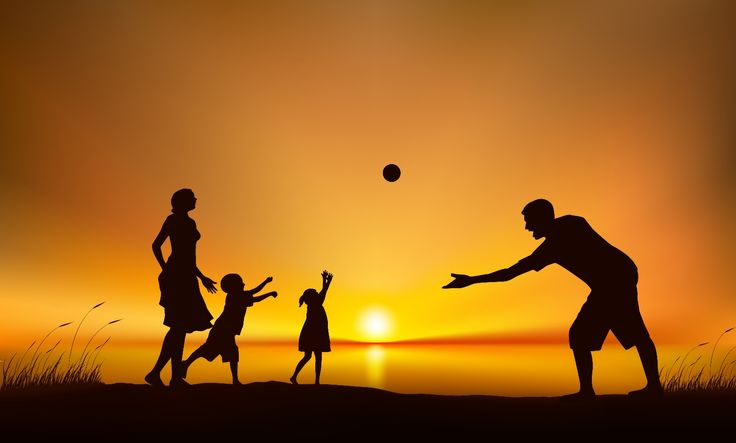

In [4]:
url_siluetas = "https://github.com/tanialoaiza/taller03_dportenis/blob/main/03.%20Imagen%20-_%20Estructura/Imagenes/siluetas.jpg?raw=true"
prompt_1 = "Dame una descripcion detallada de la imagen. Cuantas personas, objetos u elementos hay en la imagen y que actividad se esta realizando?"
procesar_imagen(url_siluetas, prompt_1)

**Prompt:** Dame una descripcion detallada de la imagen. Cuantas personas, objetos u elementos hay en la imagen y que actividad se esta realizando?

**Respuesta GPT:**

En la imagen se pueden observar cuatro personas en total. Hay dos adultos (un hombre y una mujer) y dos niños. La escena está tomada en un atardecer o amanecer, con un fondo de cielo anaranjado y el sol cerca del horizonte, reflejándose en lo que parece ser un cuerpo de agua.

Los personajes están en silueta, por lo que no se distinguen detalles faciales o de vestimenta, solo sus formas. El hombre está a la derecha lanzando una pelota, mientras que los dos niños, posicionados en el centro, están con los brazos extendidos hacia la pelota, aparentemente intentando atraparla o jugar con ella. La mujer está a la izquierda, observando la escena o caminando con ellos.

Además del sol y el cuerpo de agua al fondo, hay pasto o hierbas en la parte baja de la imagen, lo que sugiere que están en un entorno natural, posiblemente una playa o una orilla.

En resumen, en la imagen hay cuatro personas involucradas en una actividad recreativa, jugando a pasarse una pelota en un paisaje natural durante el atardecer o amanecer.

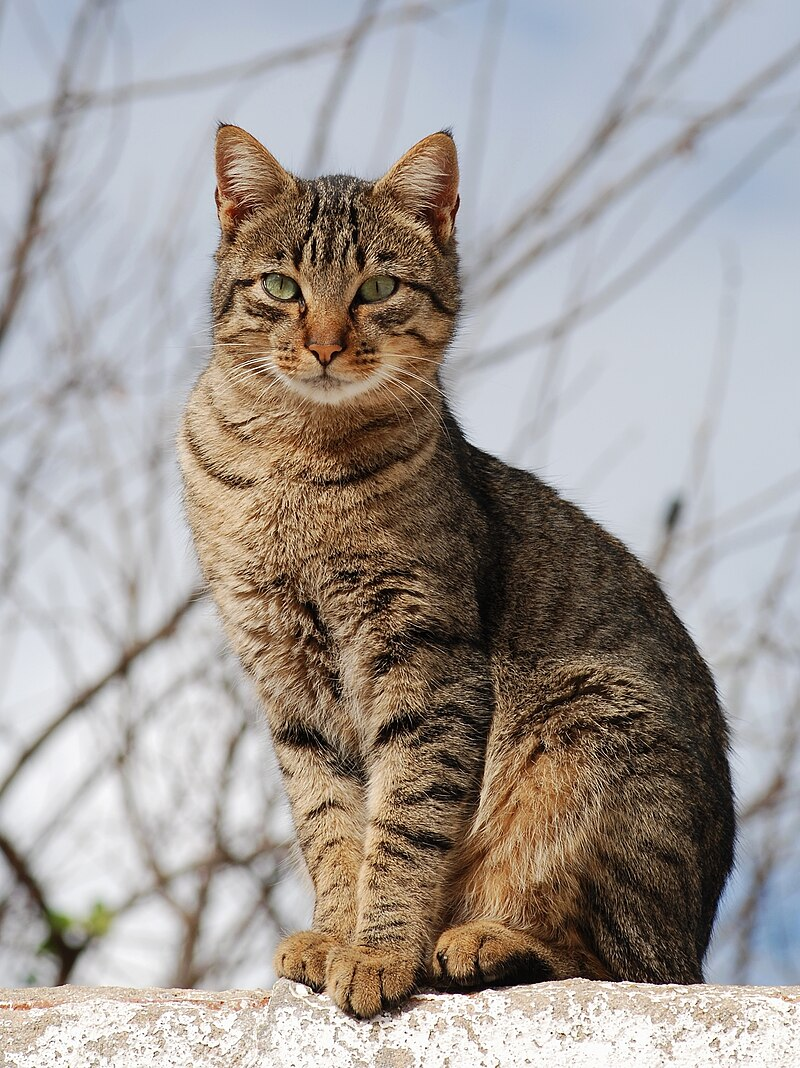

In [5]:
ruta_gato = "https://github.com/tanialoaiza/taller03_dportenis/blob/main/03.%20Imagen%20-_%20Estructura/Imagenes/Cat.jpg?raw=true"
prompt_2 = "Dame una descripcion detallada de la imagen"
procesar_imagen(ruta_gato, prompt_2)

**Prompt:** Dame una descripcion detallada de la imagen

**Respuesta GPT:**

La imagen muestra a un gato atigrado sentado sobre una superficie que parece ser de piedra o concreto. El gato tiene un pelaje corto con un patrón clásico de rayas oscuras sobre un fondo marrón claro. Sus ojos son de un color verde claro y mira directamente hacia la cámara con una expresión tranquila y atenta. Sus orejas están erguidas y el sol ilumina su cuerpo, resaltando la textura de su pelaje. En el fondo, se pueden ver ramas difusas de árboles sin hojas, lo que sugiere que la foto fue tomada en una estación fría o en un ambiente donde los árboles están deshojados. El cielo está despejado con un tono claro y poco nublado. La composición y el enfoque hacen que el gato sea el centro de atención de la imagen.

**Ejemplo 2: Identificacion de Lugares**

Una capacidad destacada de GPT-4 Vision es su habilidad para identificar lugares, escenarios y ubicaciones geográficas dentro de imágenes. El modelo puede analizar paisajes, monumentos, arquitectura y señales visibles en la escena para inferir de qué lugar se trata. Aunque no es un sistema de geolocalización exacta, puede proporcionar descripciones útiles como "una playa tropical", "una ciudad europea con arquitectura gótica" o "un edificio moderno posiblemente en Asia oriental".

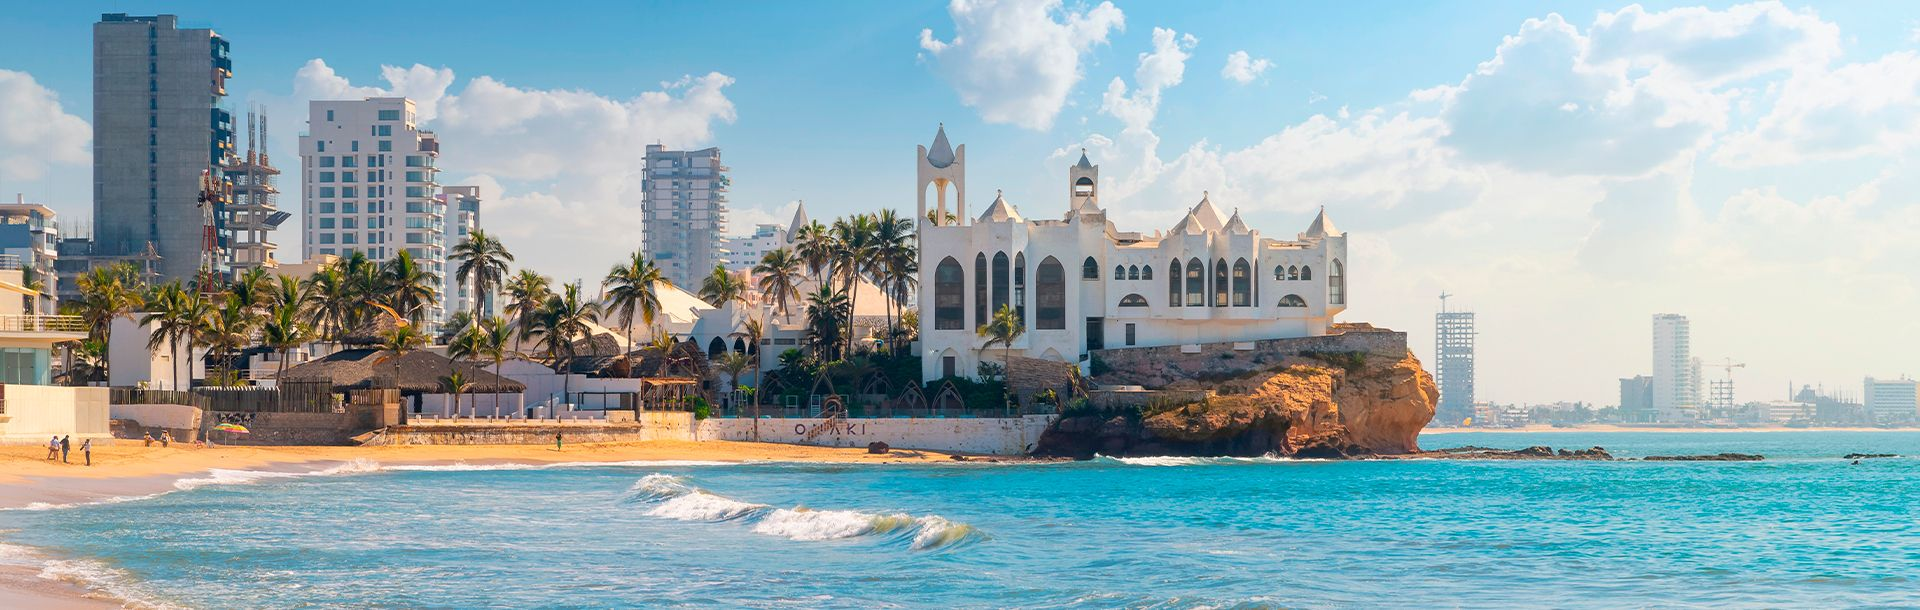

In [6]:
ruta_ciudad = "https://github.com/tanialoaiza/taller03_dportenis/blob/main/03.%20Imagen%20-_%20Estructura/Imagenes/Mazatlan.jpg?raw=true"
prompt_3 = "Identifica la ciudad de la imagen"

procesar_imagen(ruta_ciudad, prompt_3)

**Prompt:** Identifica la ciudad de la imagen

**Respuesta GPT:**

La ciudad que aparece en la imagen es Mazatlán, en el estado de Sinaloa, México. El edificio blanco sobre la roca es un ícono conocido como el "Castillo de Mazatlán" o "Castillo de La Ciudad". Además, la mezcla de la playa, las palmeras y los edificios modernos es característica de esta ciudad costera.

**Ejemplo 3: OCR con salida estructurada**

Una de las aplicaciones más potentes es convertir información visual en un formato estructurado como JSON, útil para sistemas, bases de datos o análisis automatizado.


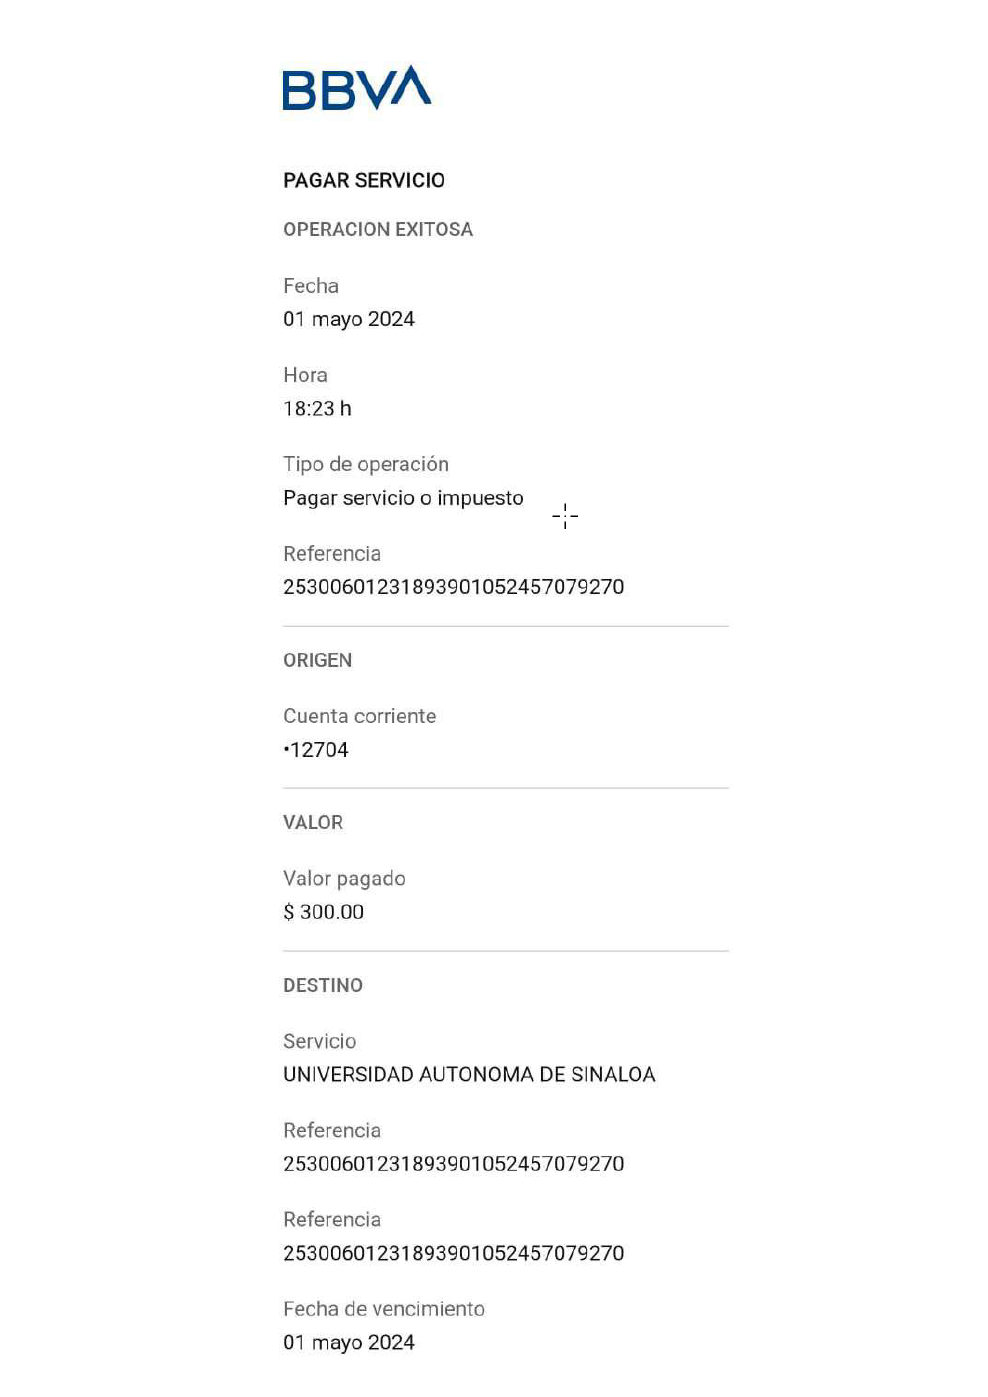

In [7]:
ruta_recibo = "https://github.com/tanialoaiza/taller03_dportenis/blob/main/03.%20Imagen%20-_%20Estructura/Imagenes/Documento.png?raw=true"
prompt_4 = "Dame las caracteristicas del documento en formato Json"
procesar_imagen(ruta_recibo, prompt_4)

**Prompt:** Dame las caracteristicas del documento en formato Json

**Respuesta GPT:**

```json
{
  "banco": "BBVA",
  "tipo_operacion": "Pagar servicio o impuesto",
  "estado_operacion": "OPERACION EXITOSA",
  "fecha": "01 mayo 2024",
  "hora": "18:23 h",
  "referencia": "25300601231893901052457079270",
  "origen": {
    "tipo_cuenta": "Cuenta corriente",
    "numero_cuenta": "12704"
  },
  "valor_pagado": 300.00,
  "destino": {
    "servicio": "UNIVERSIDAD AUTONOMA DE SINALOA",
    "referencias": [
      "25300601231893901052457079270",
      "25300601231893901052457079270"
    ],
    "fecha_vencimiento": "01 mayo 2024"
  }
}
```

**Ejemplo 4: Deteccion de objetos**

También es posible generar una salida estructurada mediante la identificación de objetos. Por ejemplo, si se le proporciona una imagen con varios productos o vehículos, el modelo puede contar cuántos hay, clasificarlos por tipo, y generar una lista o estructura en formato JSON que representa los objetos detectados junto con sus características.

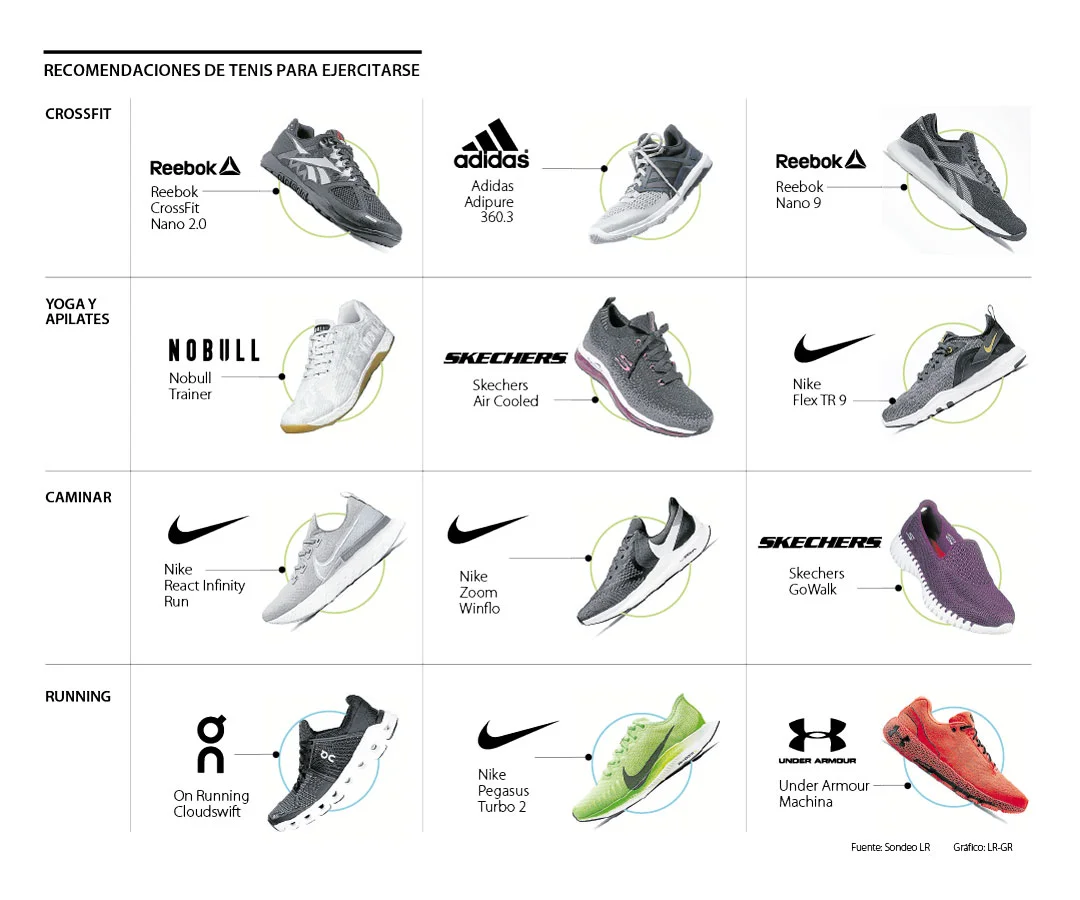

In [8]:
url_tenis = "https://github.com/tanialoaiza/taller03_dportenis/blob/main/03.%20Imagen%20-_%20Estructura/Imagenes/tenis.jpg?raw=true"

prompt_5 = "Dame las principales caracteristicas de cada tenis (nombre, marca, color, uso), junto con una descripcion de cada producto"

procesar_imagen(url_tenis, prompt_5)

**Prompt:** Dame las principales caracteristicas de cada tenis (nombre, marca, color, uso), junto con una descripcion de cada producto

**Respuesta GPT:**

Aquí tienes las principales características y una descripción de cada tenis recomendados para ejercitarse según la imagen:

**Crossfit**

1. **Reebok CrossFit Nano 2.0**  
   - Marca: Reebok  
   - Color: Negro con detalles blancos  
   - Uso: Ejercicios de Crossfit  
   - Descripción: Tenis diseñados para entrenamientos de alta intensidad en Crossfit, que ofrecen soporte y estabilidad para movimientos rápidos y variados.

2. **Adidas Adipure 360.3**  
   - Marca: Adidas  
   - Color: Gris claro con detalles oscuros  
   - Uso: Crossfit y entrenamiento funcional  
   - Descripción: De diseño ligero y flexible, ideales para entrenamiento funcional que requiere libertad de movimiento y buena amortiguación.

3. **Reebok Nano 9**  
   - Marca: Reebok  
   - Color: Negro con detalles en blanco  
   - Uso: Crossfit  
   - Descripción: Modelo avanzado para Crossfit que brinda soporte y durabilidad, adecuado para ejercicios variados que involucran levantamiento de pesas y movimientos dinámicos.

---

**Yoga y Pilates**

1. **Nobull Trainer**  
   - Marca: Nobull  
   - Color: Blanco  
   - Uso: Yoga y Pilates  
   - Descripción: Tenis minimalistas, cómodos y flexibles, adecuados para movimientos suaves y controlados de yoga o pilates.

2. **Skechers Air Cooled**  
   - Marca: Skechers  
   - Color: Gris oscuro con detalles rosa  
   - Uso: Yoga y Pilates  
   - Descripción: Calzado respirable y confortable, que proporciona buen soporte para sesiones prolongadas de yoga o pilates.

3. **Nike Flex TR 9**  
   - Marca: Nike  
   - Color: Gris oscuro con blanco y detalles dorados  
   - Uso: Yoga y Pilates  
   - Descripción: Tenis flexibles y ligeros que facilitan la estabilidad y movimientos controlados durante yoga o pilates.

---

**Caminar**

1. **Nike React Infinity Run**  
   - Marca: Nike  
   - Color: Gris claro  
   - Uso: Caminar  
   - Descripción: Diseñados para brindar confort y amortiguación a la hora de caminar largas distancias, con buena respuesta y soporte.

2. **Nike Zoom Winflo**  
   - Marca: Nike  
   - Color: Negro y blanco  
   - Uso: Caminar  
   - Descripción: Modelo dinámico, ofrece amortiguación y estabilidad para caminar con comodidad.

3. **Skechers GoWalk**  
   - Marca: Skechers  
   - Color: Morado  
   - Uso: Caminar  
   - Descripción: Calzado ligero y cómodo, pensado para largas caminatas gracias a su suela flexible y amortiguada.

---

**Running**

1. **On Running Cloudswift**  
   - Marca: On Running  
   - Color: Negro con blanco  
   - Uso: Running  
   - Descripción: Tenis especializados para correr que ofrecen excelente amortiguación y soporte para carreras de media y larga distancia.

2. **Nike Pegasus Turbo 2**  
   - Marca: Nike  
   - Color: Verde neón con negro  
   - Uso: Running  
   - Descripción: Calzado diseñado para velocidad y rendimiento con amortiguación reactiva, ideal para corredoras y corredores que buscan rapidez.

3. **Under Armour Machina**  
   - Marca: Under Armour  
   - Color: Naranja con negro  
   - Uso: Running  
   - Descripción: Tenis ligeros y aerodinámicos que ayudan a mejorar la velocidad y el rendimiento durante las carreras.

---

Si necesitas mayor detalle o alguna otra información, ¡dímelo!

# **Ejercicio 1:**

**Objetivo:**

Redactar un prompt para extraer la informacion de la imagen anterior (**nombre, marca, color, uso, descripcion**) pero organizada de forma estructurada (Json)

In [9]:
prompt_ejercicio_1= ""

procesar_imagen(url_tenis, prompt_ejercicio_1)

**Prompt:** 

**Respuesta GPT:**

Estas son las recomendaciones de tenis para ejercitarse según la imagen:

**Crossfit:**
- Reebok CrossFit Nano 2.0
- Adidas Adipure 360.3
- Reebok Nano 9

**Yoga y Pilates:**
- Nobull Trainer
- Skechers Air Cooled
- Nike Flex TR 9

**Caminar:**
- Nike React Infinity Run
- Nike Zoom Winflo
- Skechers GoWalk

**Running:**
- On Running Cloudswift
- Nike Pegasus Turbo 2
- Under Armour Machina

# **Ejercicio 2:**

**Objetivo:**

Redactar un prompt efectivo para que ChatGPT analice una imagen que contiene diferentes vehículos y devuelva una descripción estructurada en formato JSON.

**Instrucciones:**

1.   Observa la imagen proporcionada:
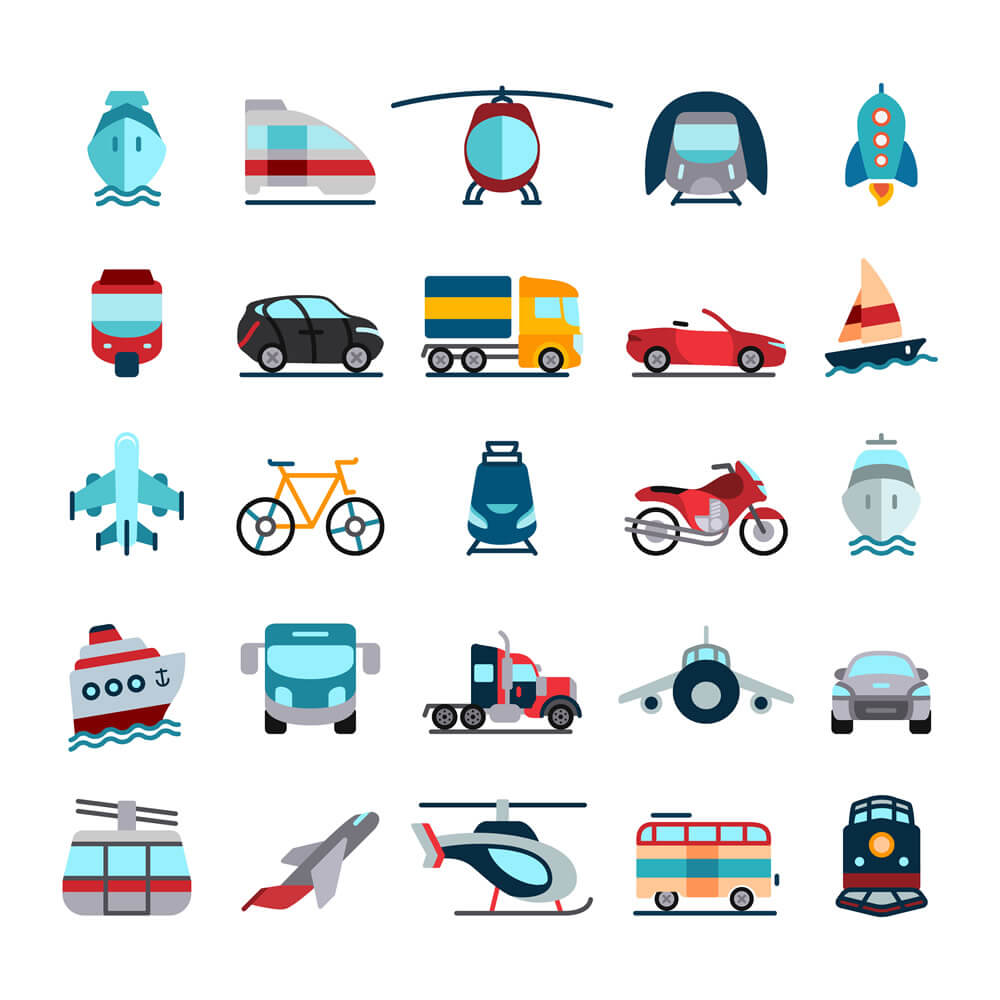
2.  Analiza la información que necesitas extraer de la imagen:
    *   Descripción general de cada vehículo.
    *   Tipo de vehículo: ¿es terrestre, aéreo o acuático?
    *   Color de cada vehículo.
    *   Cantidad de vehículos por tipo.

3.  Tu tarea consiste en redactar un prompt que le puedas dar a ChatGPT para que te dé esa información.

4.  El prompt debe pedir explícitamente que la respuesta venga estructurada en formato JSON (y sin usar markdown).




In [ ]:
imagen_ejercicio_2= "https://github.com/tanialoaiza/taller03_dportenis/blob/main/03.%20Imagen%20-_%20Estructura/Imagenes/Vehiculo.jpg?raw=true"
prompt_ejercicio_2= ""

procesar_imagen(imagen_ejercicio_2, prompt_ejercicio_2)

**Prompt:** 

**Respuesta GPT:**

The image shows a grid of various transportation icons arranged in five rows and six columns. Here is a description of the transportation types from left to right, top to bottom:

1. Ship (front view)
2. High-speed train
3. Helicopter (front view)
4. Train (front view)
5. Rocket ship
6. Train (front view)
7. Car (side view)
8. Truck (side view)
9. Convertible car (side view)
10. Sailboat
11. Airplane (top view)
12. Bicycle
13. Another train or tram (front view)
14. Motorcycle (side view)
15. Ship (side view)
16. Cruise ship
17. Bus (front view)
18. Semi-truck (side view)
19. Airplane (front view)
20. Car (front view)
21. Cable car/gondola
22. Airplane taking off/ascending
23. Helicopter (side view)
24. Double-decker bus
25. Train engine (front view)

These icons represent various modes of transportation including land, sea, and air vehicles.